# King County

In [1]:
%%capture
import sys
!ln -s ../syntheticml .
!{sys.executable} -m pip install -r ../requirements.txt
!{sys.executable} -m pip install -U kaleido
!{sys.executable} -m pip install git+https://github.com/mostly-ai/virtualdatalab.git

In [2]:
import pandas as pd
df = pd.read_csv('../datasets/kingcounty/raw/kc_house_data.csv');
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14658,5104220120,20150107T000000,320000.0,4,1.75,1710,10480,1.5,0,0,...,6,1710,0,1969,0,98059,47.4743,-122.143,1750,10480
6525,6431500280,20150323T000000,393000.0,2,1.00,830,5000,1.0,0,0,...,7,830,0,1921,0,98103,47.6914,-122.352,1110,5000
20322,5556300098,20140612T000000,1240000.0,5,4.00,4410,14380,2.0,0,0,...,11,4410,0,2006,0,98052,47.6463,-122.121,2720,11454


In [3]:
%%capture
from syntheticml.data.synthetic import Synthetic, MODELS
syn = Synthetic(df, 
        id="id",
        #category_columns=("condition", "floors", "grade", "view", "waterfront", "yr_built", "yr_renovated", "zipcode", "bathrooms", "bedrooms",),
        category_columns=("condition", "floors", "grade", "view", "waterfront", "zipcode", "bathrooms", "bedrooms",),
        #exclude_columns=('date',),
        synthetic_folder = "../datasets/kingcounty/synth",
        models=MODELS.keys(),
        target_column="price",
        n_sample = 21613,
        max_cpu_pool=1
)

In [4]:
%%capture  --no-display
syn.process()

syn.process_scores()


## Metricas
### Continuas

In [5]:
metrics = syn.current_metrics()
metrics[~metrics.is_categorical].dropna(axis=1, how='all')

,name,top5,top5_freq,top5_prob,is_categorical,nobs,missing,mean,std_err,upper_ci,...,mode_freq,median,0.1%,1.0%,5.0%,25.0%,75.0%,95.0%,99.0%,99.9%
2,yr_built,"[2014, 2005, 2006, 2004, 2007]","[449, 371, 366, 350, 347]","[0.025968768074031232, 0.02145748987854251, 0....",False,17290.0,0.0,1971.108329,0.223859,1971.547085,...,0.025969,1975.0000,1900.000000,1904.000000,1915.0000,1951.000,1997.000,2.011000e+03,2.014000e+03,2.015000e+03
4,lat,"[47.5402, 47.6875, 47.686, 47.6624, 47.5518]","[14, 13, 13, 13, 13]","[0.0008097165991902834, 0.0007518796992481203,...",False,17290.0,0.0,47.560330,0.001053,47.562393,...,0.000810,47.5718,47.192729,47.257334,47.3107,47.472,47.678,4.774995e+01,4.777281e+01,4.777670e+01
6,sqft_lot15,"[5000, 4000, 6000, 7200, 4800]","[349, 289, 224, 160, 120]","[0.02018507807981492, 0.016714864083285135, 0....",False,17290.0,0.0,12725.059341,209.331173,13135.340900,...,0.020185,7615.0000,886.289000,1189.000000,1965.0000,5083.000,10046.000,3.682165e+04,1.682959e+05,3.069984e+05
7,sqft_living,"[1400, 1300, 1720, 1250, 1540]","[109, 107, 106, 106, 105]","[0.006304222093695778, 0.006188548293811452, 0...",False,17290.0,0.0,2073.894910,6.900053,2087.418766,...,0.006304,1910.0000,522.890000,720.000000,940.0000,1430.000,2540.000,3.740000e+03,4.921100e+03,6.965550e+03
8,sqft_basement,"[0, 600, 700, 500, 800]","[10553, 182, 169, 167, 164]","[0.6103528050896472, 0.010526315789473684, 0.0...",False,17290.0,0.0,287.932736,3.336545,294.472244,...,0.610353,0.0000,0.000000,0.000000,0.0000,0.000,550.000,1.180000e+03,1.650000e+03,2.324220e+03
9,sqft_lot,"[5000, 4000, 6000, 7200, 4800]","[301, 209, 208, 179, 98]","[0.017408906882591092, 0.012087912087912088, 0...",False,17290.0,0.0,14798.947368,295.374719,15377.871180,...,0.017409,7600.0000,737.156000,1005.000000,1756.0000,5001.250,10606.750,4.299910e+04,2.121922e+05,4.356000e+05
10,price,"[350000.0, 450000.0, 425000.0, 550000.0, 32500...","[143, 140, 123, 123, 123]","[0.008270676691729323, 0.008097165991902834, 0...",False,17290.0,0.0,537768.047947,2748.953957,543155.898699,...,0.008271,450000.0000,95000.000000,154467.000000,210000.0000,320150.000,640000.000,1.150000e+06,1.950000e+06,3.331995e+06
12,long,"[-122.29, -122.362, -122.288, -122.3, -122.372]","[100, 88, 81, 81, 81]","[0.00578368999421631, 0.005089647194910353, 0....",False,17290.0,0.0,-122.214139,0.001068,-122.212045,...,0.005784,-122.2310,-122.497000,-122.408000,-122.3870,-122.329,-122.125,-1.219790e+02,-1.217870e+02,-1.216989e+02
13,sqft_living15,"[1440, 1540, 1560, 1500, 1610]","[156, 154, 152, 137, 136]","[0.009022556390977444, 0.008906882591093117, 0...",False,17290.0,0.0,1982.904569,5.180812,1993.058774,...,0.009023,1840.0000,740.000000,950.000000,1140.0000,1480.000,2360.000,3.280000e+03,4.050000e+03,4.985550e+03
15,yr_renovated,"[0, 2014, 2005, 2000, 2003]","[16571, 76, 32, 30, 29]","[0.9584152689415847, 0.004395604395604396, 0.0...",False,17290.0,0.0,83.003412,3.030640,88.943358,...,0.958415,0.0000,0.000000,0.000000,0.0000,0.000,0.000,0.000000e+00,2.008000e+03,2.014000e+03


In [6]:
print(metrics[~metrics.is_categorical].dropna(axis=1, how='all').head(1).T.style.to_latex())

\begin{tabular}{ll}
 & 2 \\
name & yr_built \\
top5 & [2014 2005 2006 2004 2007] \\
top5_freq & [449 371 366 350 347] \\
top5_prob & [0.02596877 0.02145749 0.02116831 0.02024291 0.0200694 ] \\
is_categorical & False \\
nobs & 17290.000000 \\
missing & 0.000000 \\
mean & 1971.108329 \\
std_err & 0.223859 \\
upper_ci & 1971.547085 \\
lower_ci & 1970.669572 \\
std & 29.435603 \\
iqr & 46.000000 \\
iqr_normal & 34.099851 \\
mad & 24.632379 \\
mad_normal & 30.872109 \\
coef_var & 0.014934 \\
range & 115.000000 \\
max & 2015.000000 \\
min & 1900.000000 \\
skew & -0.471787 \\
kurtosis & 2.337474 \\
jarque_bera & 957.630965 \\
jarque_bera_pval & 0.000000 \\
mode & 2014.000000 \\
mode_freq & 0.025969 \\
median & 1975.000000 \\
0.1% & 1900.000000 \\
1.0% & 1904.000000 \\
5.0% & 1915.000000 \\
25.0% & 1951.000000 \\
75.0% & 1997.000000 \\
95.0% & 2011.000000 \\
99.0% & 2014.000000 \\
99.9% & 2015.000000 \\
\end{tabular}



### Categoricas

In [7]:
metrics[metrics.is_categorical].dropna(axis=1, how='all').head(1).T.to_markdown()

/home/gvillarroel/.pyenv/versions/3.9.15/envs/syn/lib/python3.9/site-packages/tabulate/__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)
/home/gvillarroel/.pyenv/versions/3.9.15/envs/syn/lib/python3.9/site-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


'|                | 0                                                        |\n|:---------------|:---------------------------------------------------------|\n| name           | condition                                                |\n| top5           | [3 4 5 2 1]                                              |\n| top5_freq      | [11248  4512  1364   139    27]                          |\n| top5_prob      | [0.65054945 0.26096009 0.07888953 0.00803933 0.0015616 ] |\n| is_categorical | True                                                     |\n| nobs           | 17290.0                                                  |\n| missing        | 17290.0                                                  |'

In [8]:
len(metrics[~metrics.is_categorical].dropna(axis=1, how='all').columns)-1+len(metrics[metrics.is_categorical].dropna(axis=1, how='all').columns)-1

40

## Scores

In [9]:
best_model = "tddpm_mlp_21613"
second_best_model = "smote-enc_21613"
avg = syn.scores[syn.scores["type"] == "avg"]
avg.sort_values("score", ascending=False).loc[["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"],["score", "DCR ST 5th", "DCR SH 5th", "DCR TH 5th"]]
#["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"]

,score,DCR ST 5th,DCR SH 5th,DCR TH 5th
name,,,,
tddpm_mlp_21613,0.962789,0.084187,0.104472,0.03575
smote-enc_21613,0.954592,0.058759,0.090209,0.03575
gaussiancopula_noise_21613,0.827655,0.209163,0.229880,0.03575
tvae_21613,0.819230,0.108154,0.133609,0.03575
tvae_noise_21613,0.814853,0.121998,0.139551,0.03575
gaussiancopula_21613,0.812633,0.206765,0.226026,0.03575
copulagan_noise_21613,0.803317,0.230017,0.253036,0.03575
copulagan_21613,0.780299,0.219406,0.242047,0.03575
ctgan_noise_21613,0.760218,0.207462,0.230596,0.03575


In [60]:
print(avg.sort_values("score", ascending=False).loc[["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"],["score", "DCR ST 5th", "DCR SH 5th", "DCR TH 5th"]].style.to_latex().replace("_", "\_"))


\begin{tabular}{lrrrr}
 & score & DCR ST 5th & DCR SH 5th & DCR TH 5th \\
name &  &  &  &  \\
tddpm\_mlp\_21613 & 0.962789 & 0.084187 & 0.104472 & 0.035750 \\
smote-enc\_21613 & 0.954592 & 0.058759 & 0.090209 & 0.035750 \\
gaussiancopula\_noise\_21613 & 0.827655 & 0.209163 & 0.229880 & 0.035750 \\
tvae\_21613 & 0.819230 & 0.108154 & 0.133609 & 0.035750 \\
tvae\_noise\_21613 & 0.814853 & 0.121998 & 0.139551 & 0.035750 \\
gaussiancopula\_21613 & 0.812633 & 0.206765 & 0.226026 & 0.035750 \\
copulagan\_noise\_21613 & 0.803317 & 0.230017 & 0.253036 & 0.035750 \\
copulagan\_21613 & 0.780299 & 0.219406 & 0.242047 & 0.035750 \\
ctgan\_noise\_21613 & 0.760218 & 0.207462 & 0.230596 & 0.035750 \\
ctgan\_21613 & 0.741038 & 0.210415 & 0.232722 & 0.035750 \\
\end{tabular}



In [10]:
syn.scores.type.unique()

array(['avg', 'Column Shapes', 'Column Pair Trends', 'Coverage',
       'Synthesis', 'Boundaries'], dtype=object)

In [11]:
print(syn.scores.sort_values("score", ascending=False).loc[["tddpm_mlp_21613","smote-enc_21613","gaussiancopula_noise_21613","tvae_21613", "tvae_noise_21613","gaussiancopula_21613","copulagan_noise_21613","copulagan_21613","ctgan_noise_21613","ctgan_21613"],["type", "score"]].reset_index().pivot(index="name", columns=["type"],values="score").sort_values("avg", ascending=False).rename(columns={'avg':'Score'}).loc[:,["Synthesis","Column Pair Trends", "Column Shapes", "Coverage", "Boundaries", "Score"]].style.to_latex().replace("_", "\_"))
# .style.to_latex()
#syn.scores[syn.scores["type"] != "avg"].sort_values("score", ascending=False).loc[["tddpm_mlp_21613","smote-enc_21613"],["type", "score", "DCR ST 5th", "DCR SH 5th", "DCR TH 5th"]]

\begin{tabular}{lrrrrrr}
type & Synthesis & Column Pair Trends & Column Shapes & Coverage & Boundaries & Score \\
name &  &  &  &  &  &  \\
tddpm\_mlp\_21613 & 1.000000 & 0.954061 & 0.971517 & 0.957822 & 1.000000 & 0.962789 \\
smote-enc\_21613 & 0.999400 & 0.941977 & 0.967207 & 0.819791 & 0.999933 & 0.954592 \\
gaussiancopula\_noise\_21613 & 1.000000 & 0.845585 & 0.809726 & 0.743905 & 1.000000 & 0.827655 \\
tvae\_21613 & 1.000000 & 0.781927 & 0.856533 & 0.650293 & 1.000000 & 0.819230 \\
tvae\_noise\_21613 & 1.000000 & 0.770583 & 0.859122 & 0.755993 & 1.000000 & 0.814853 \\
gaussiancopula\_21613 & 1.000000 & 0.833007 & 0.792259 & 0.712337 & 1.000000 & 0.812633 \\
copulagan\_noise\_21613 & 1.000000 & 0.761719 & 0.844915 & 0.881674 & 1.000000 & 0.803317 \\
copulagan\_21613 & 1.000000 & 0.745335 & 0.815264 & 0.868310 & 1.000000 & 0.780299 \\
ctgan\_noise\_21613 & 1.000000 & 0.749491 & 0.770946 & 0.852362 & 1.000000 & 0.760218 \\
ctgan\_21613 & 1.000000 & 0.735844 & 0.746231 & 0.850212 & 1.

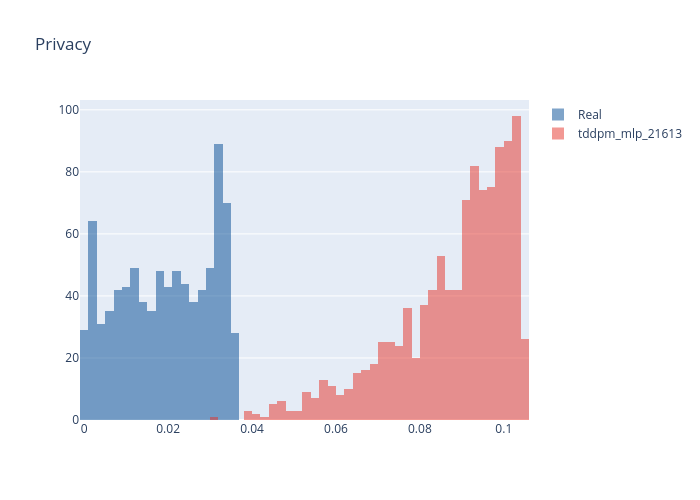

None

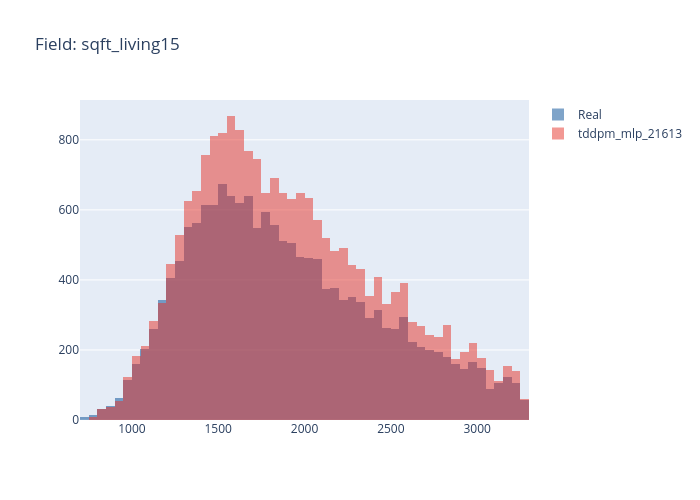

None

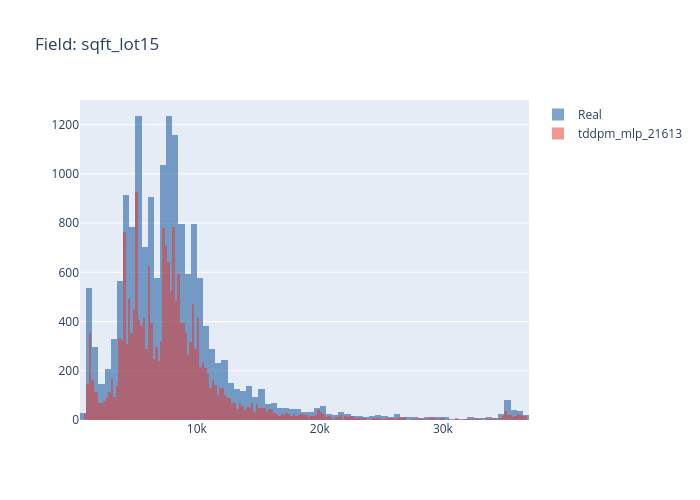

None

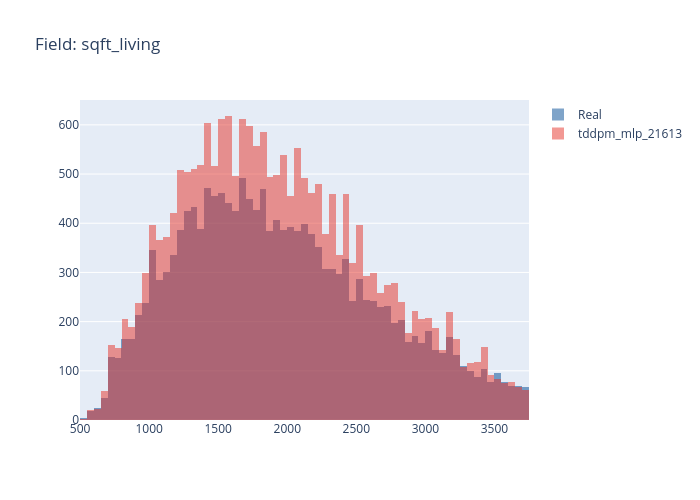

None

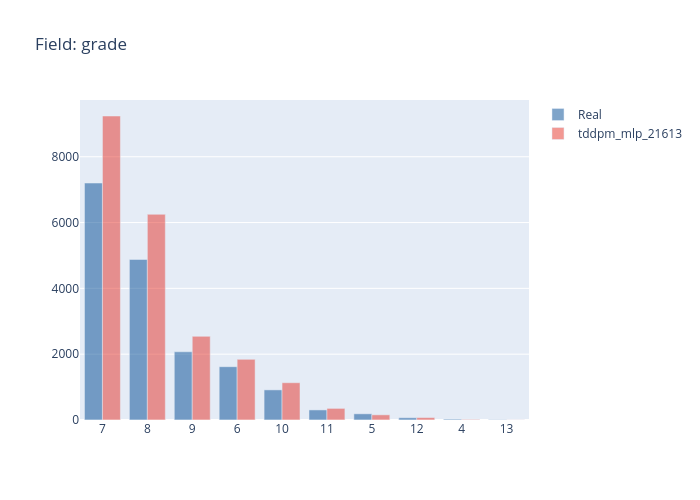

None

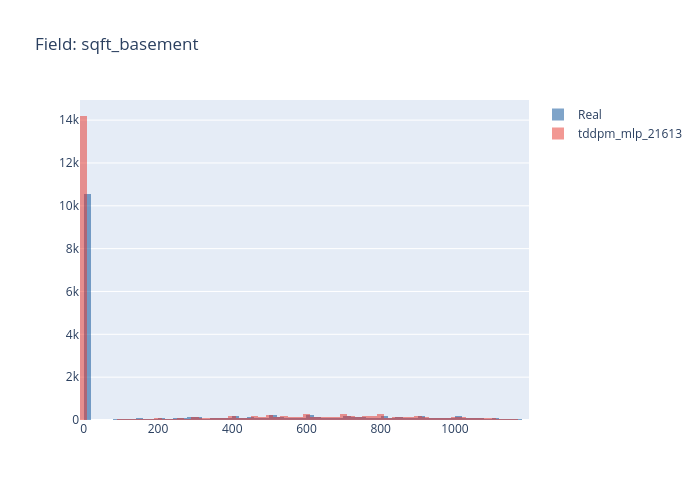

None

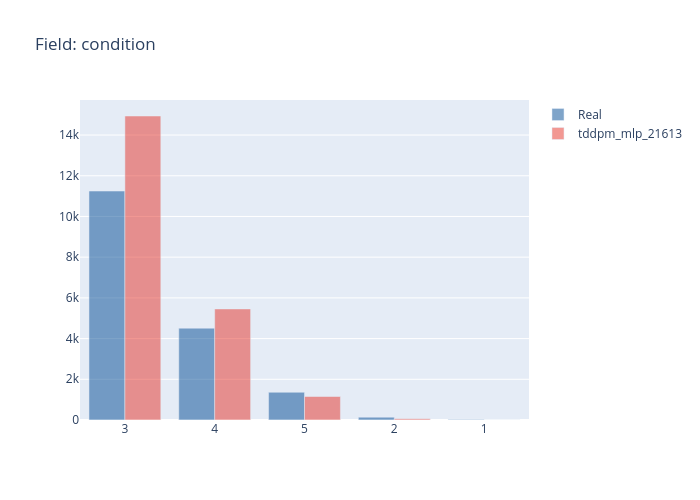

None

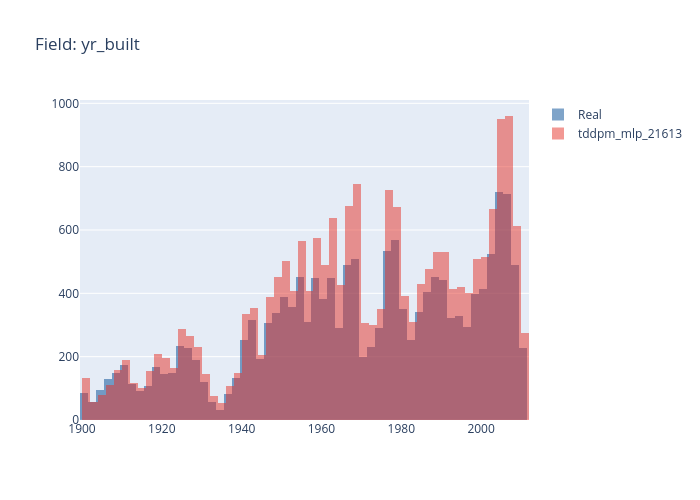

None

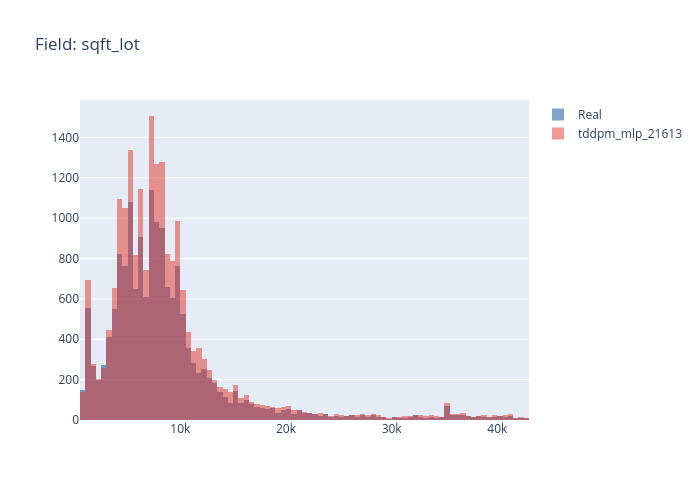

None

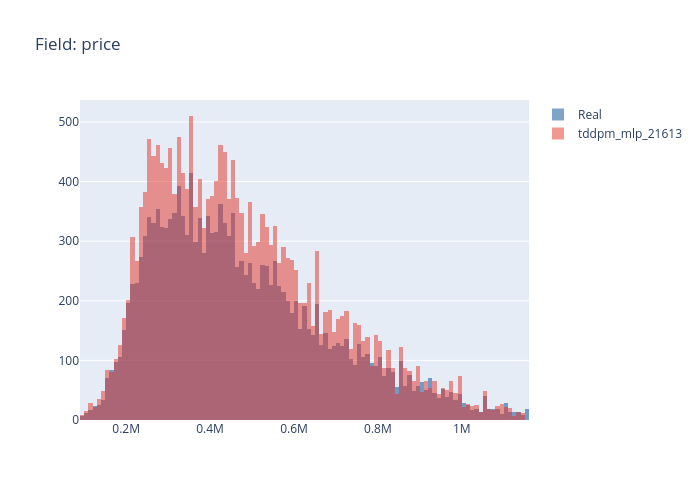

None

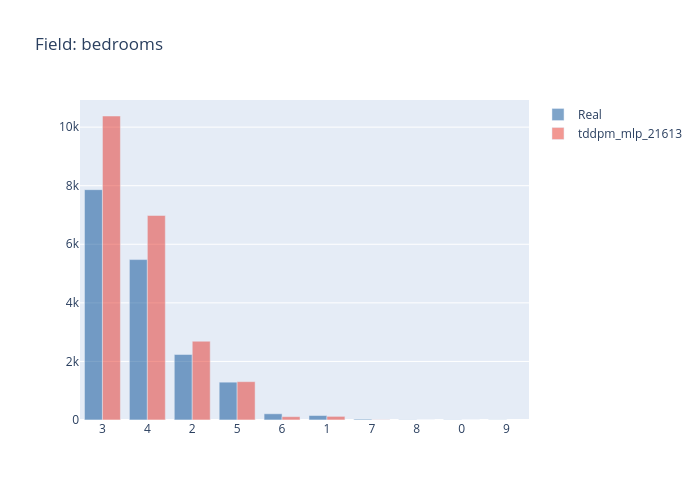

None

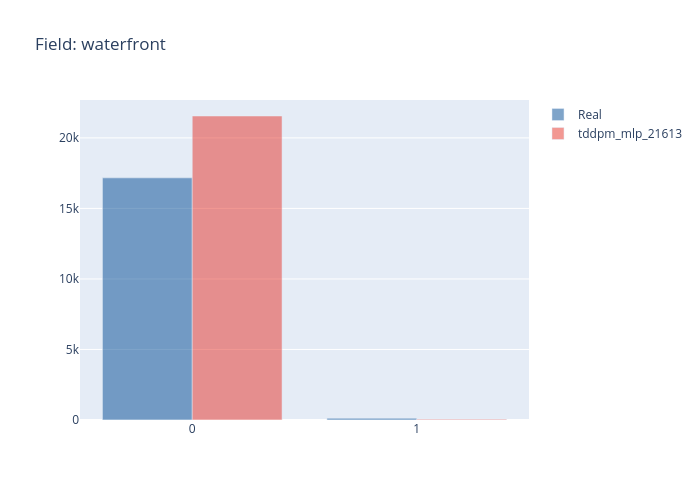

None

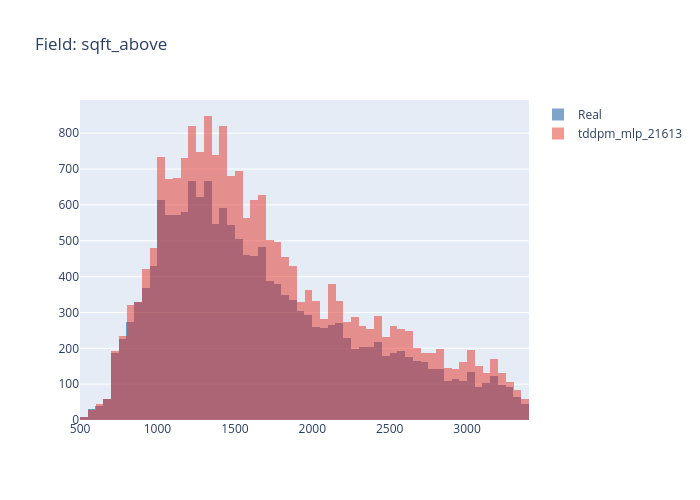

None

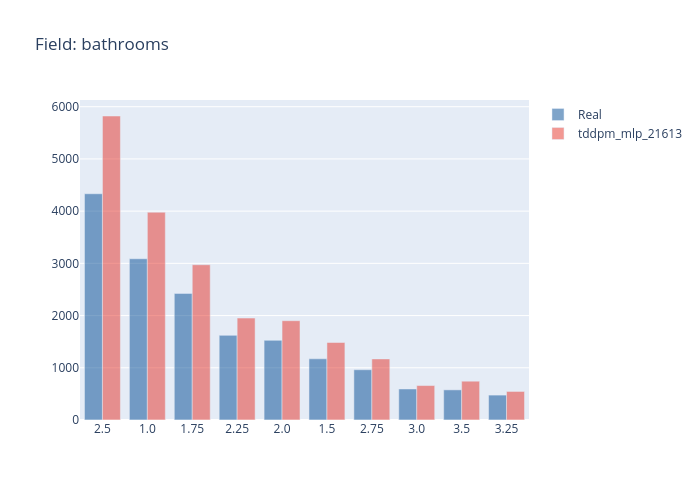

None

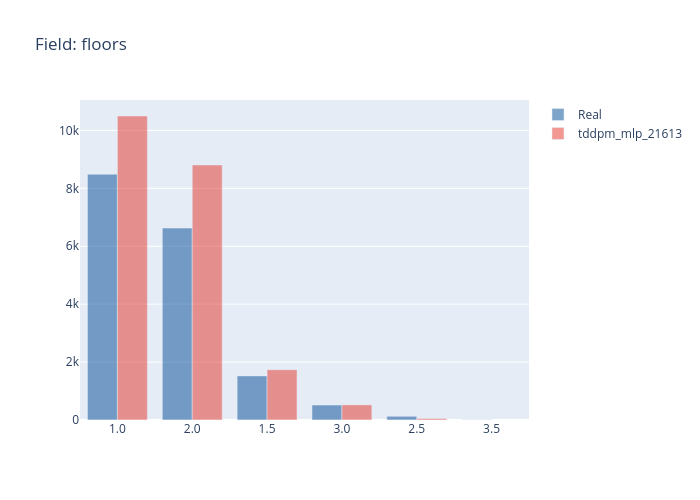

None

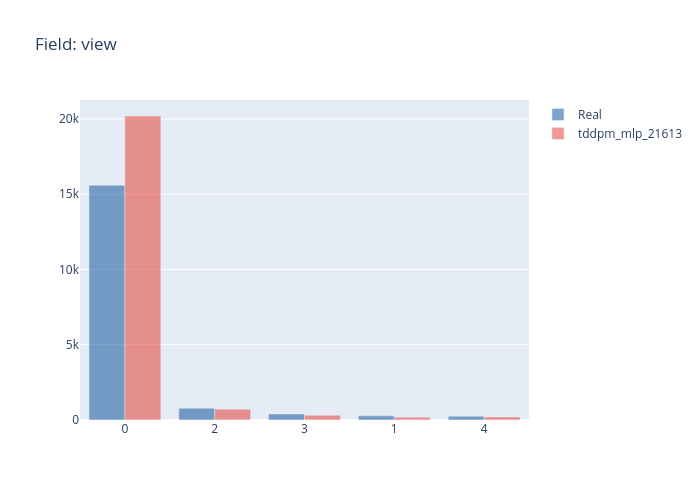

None

In [12]:
from syntheticml.data.charts import Charts
import os
folder_path = f"../docs/tesis/imagenes/kingcounty/{best_model}"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
for fig in syn.get_charts(best_model, {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        file_name = f'{fig.layout.title.text.replace(":","").replace(" ","_").lower()}.svg'
        fig.write_image(f"{folder_path}/{file_name}")
        display(fig.show("png"))

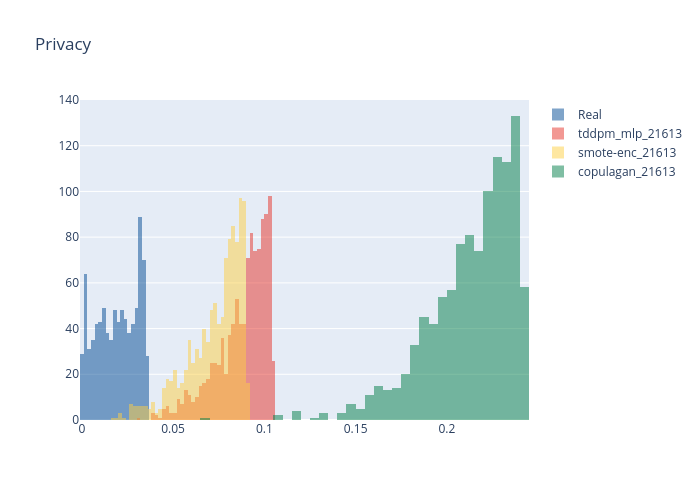

None

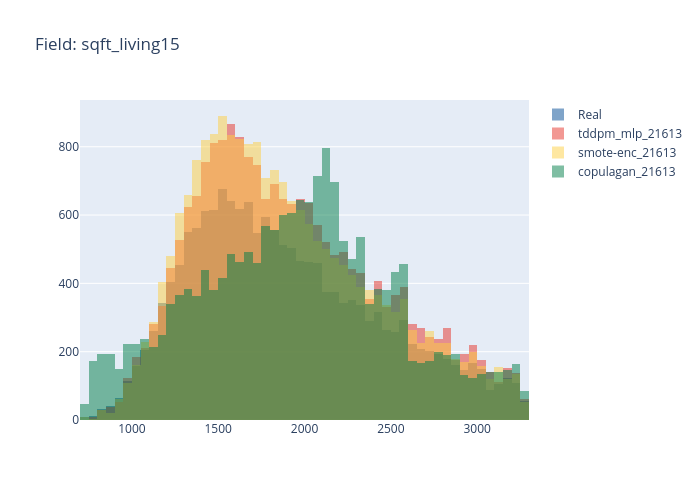

None

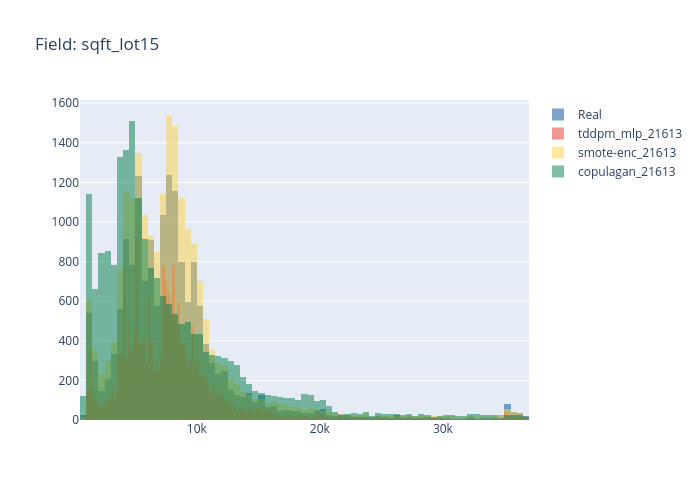

None

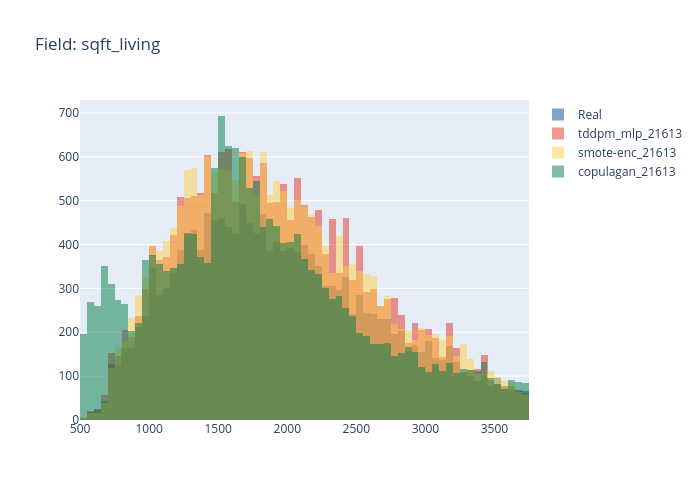

None

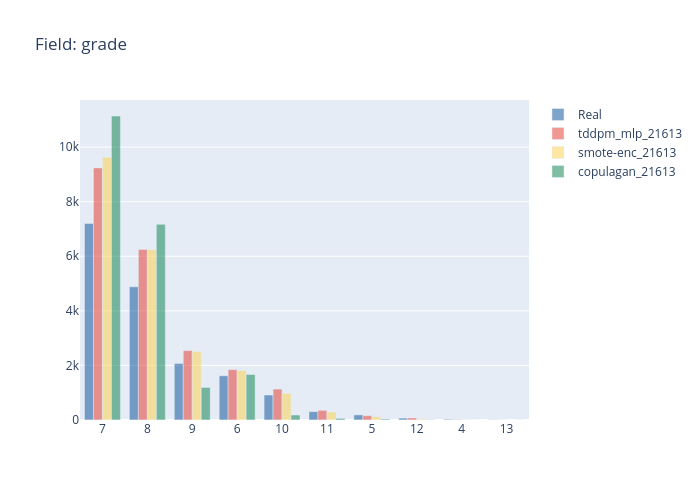

None

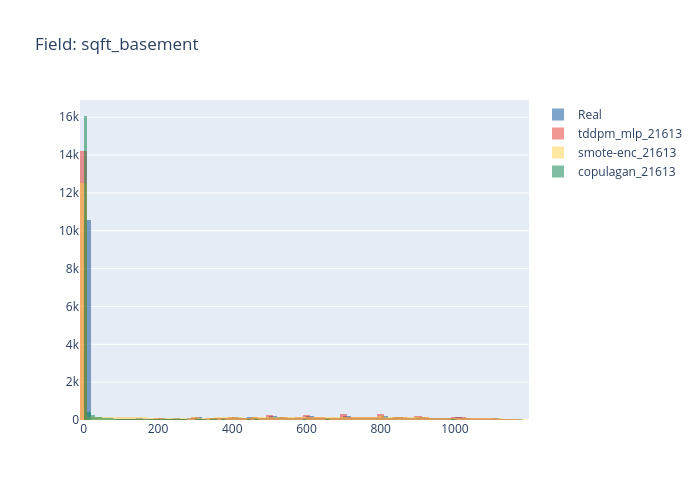

None

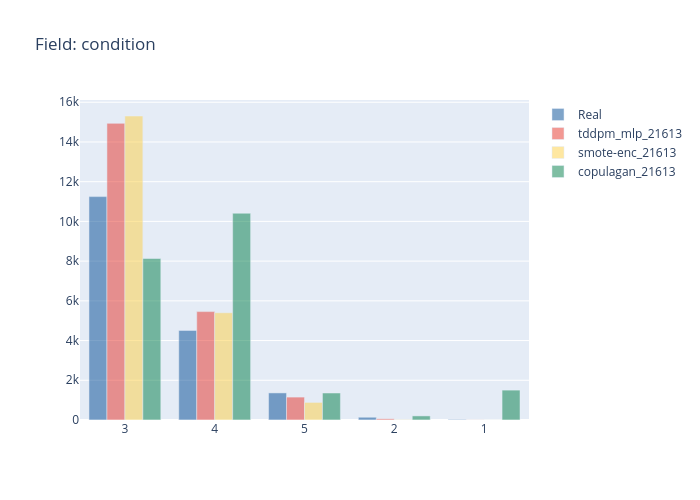

None

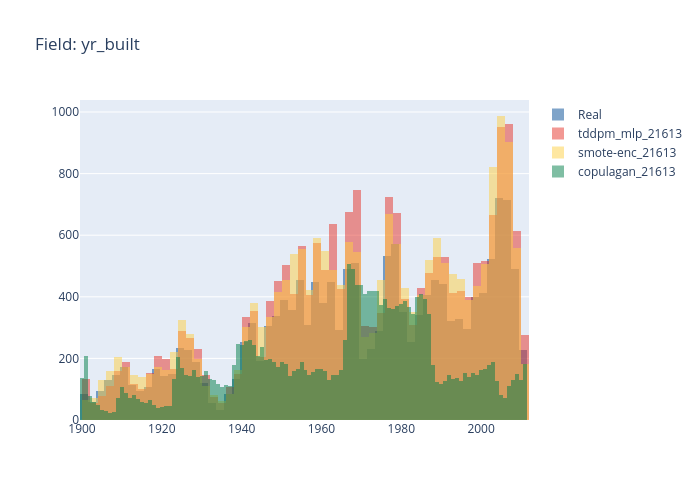

None

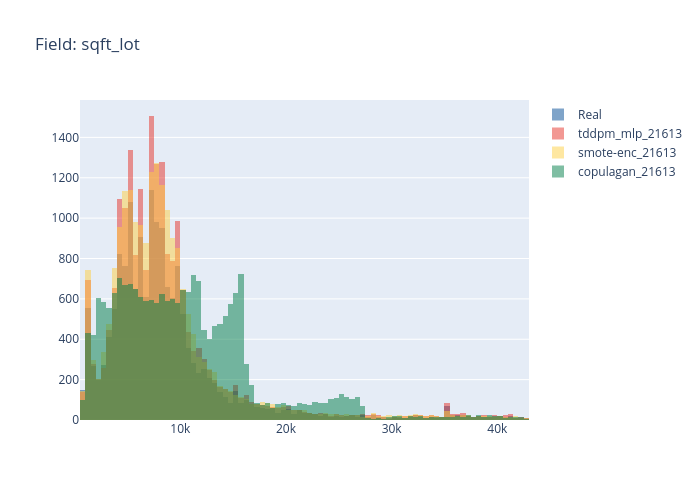

None

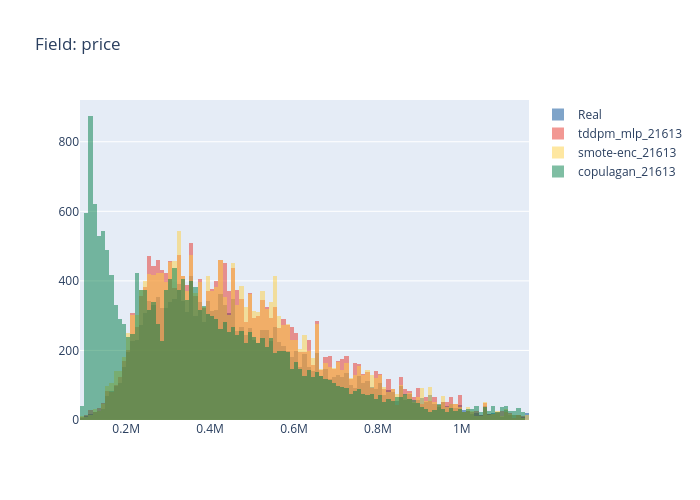

None

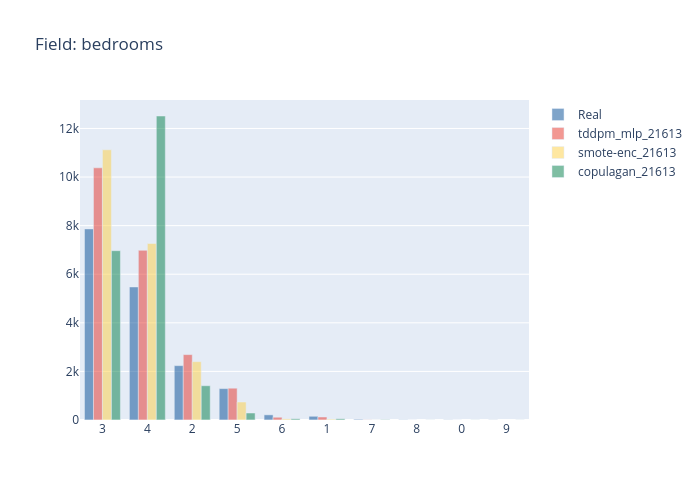

None

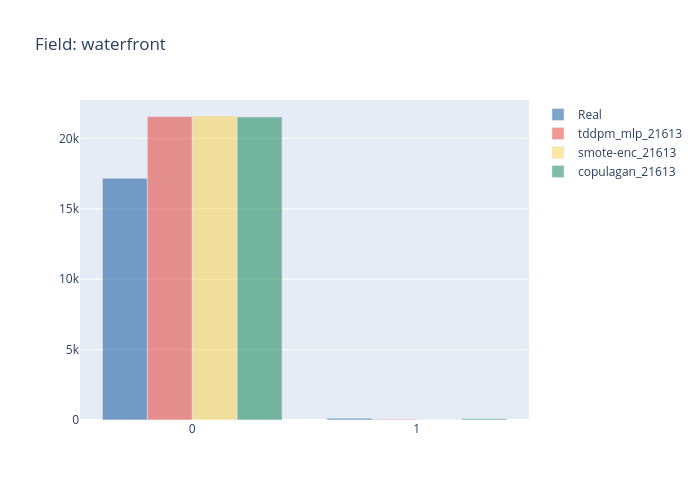

None

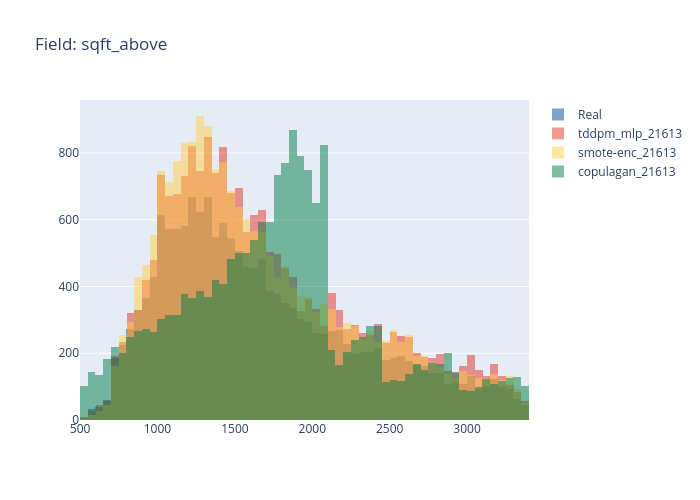

None

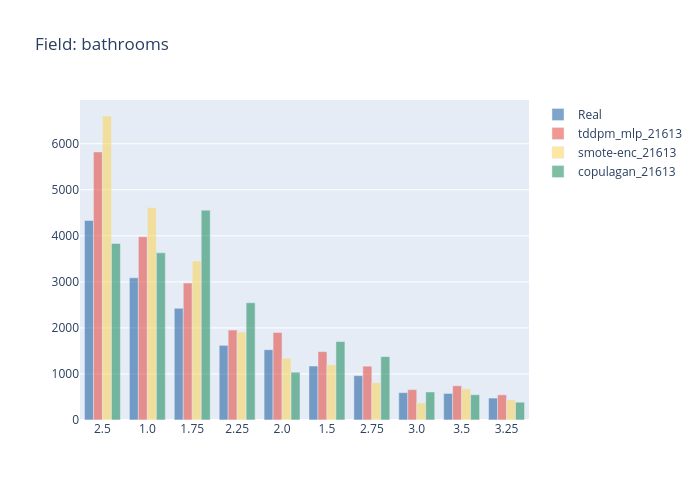

None

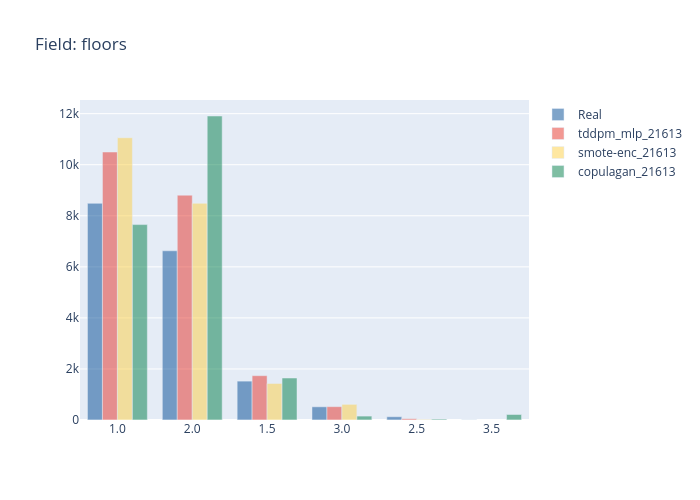

None

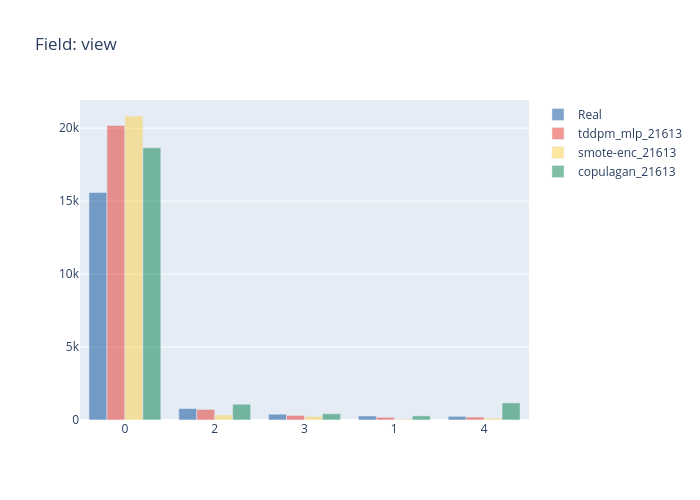

None

In [13]:
import os
folder_path = f"../docs/tesis/imagenes/kingcounty/top2+1"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
for fig in syn.get_multiple_charts([best_model,second_best_model,"copulagan_21613"], {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        file_name = f'{fig.layout.title.text.replace(":","").replace(" ","_").lower()}.svg'
        fig.write_image(f"{folder_path}/{file_name}")
        display(fig.show("png"))


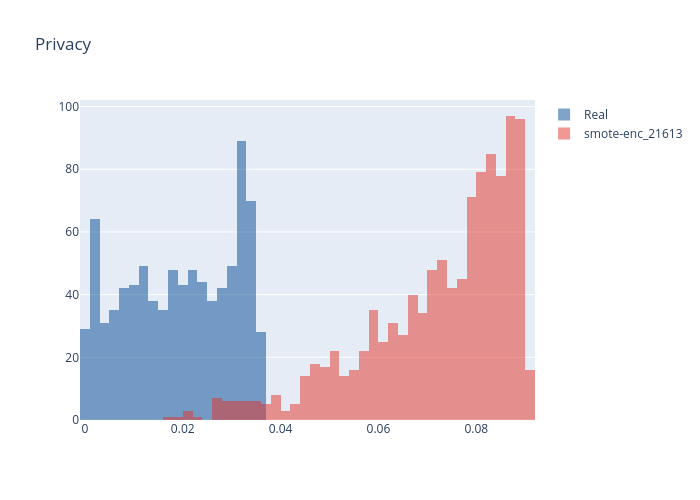

None

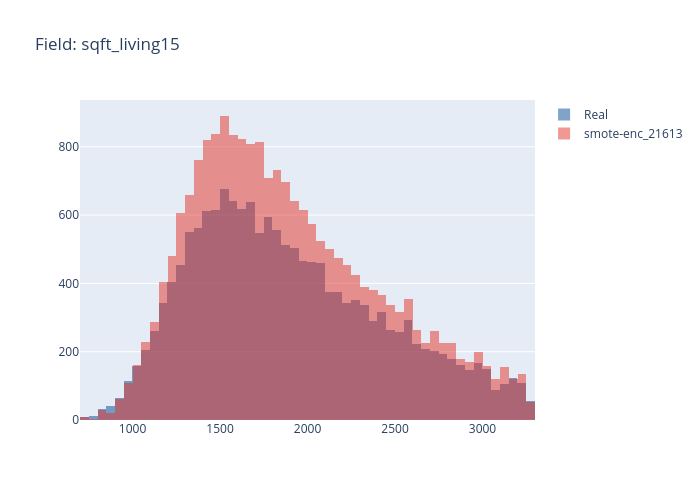

None

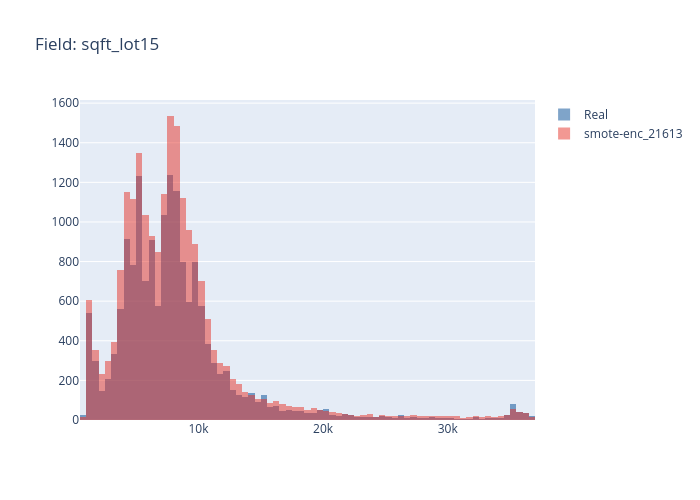

None

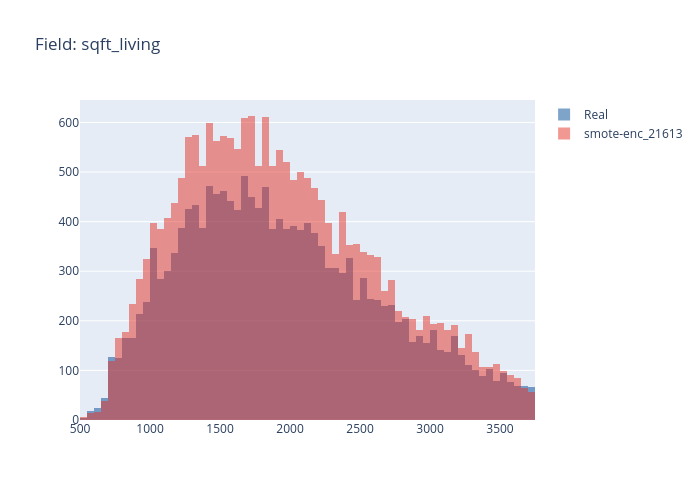

None

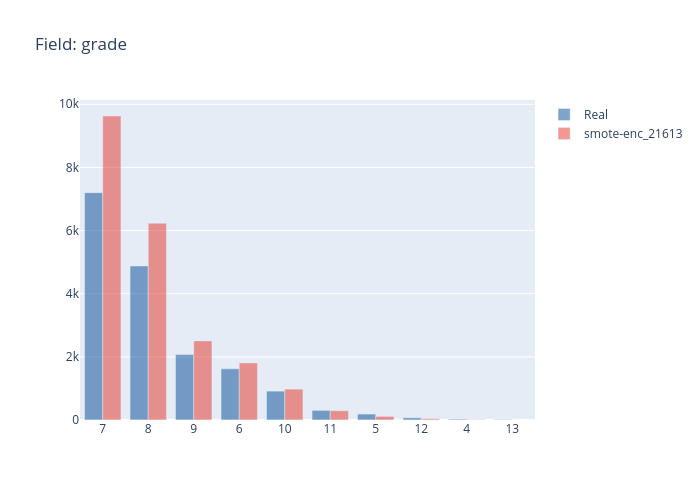

None

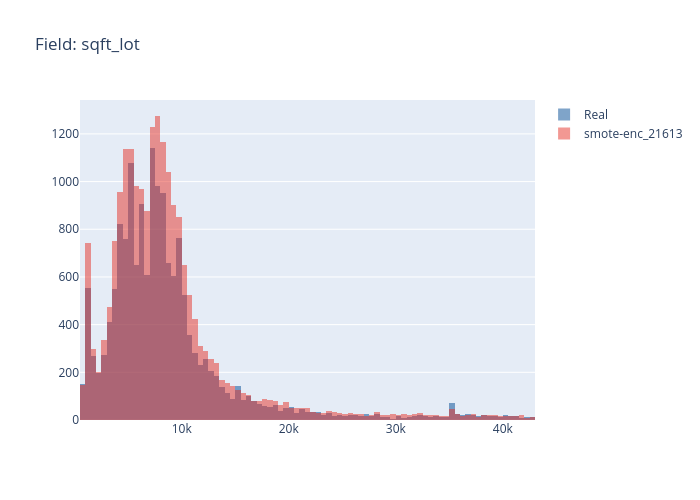

None

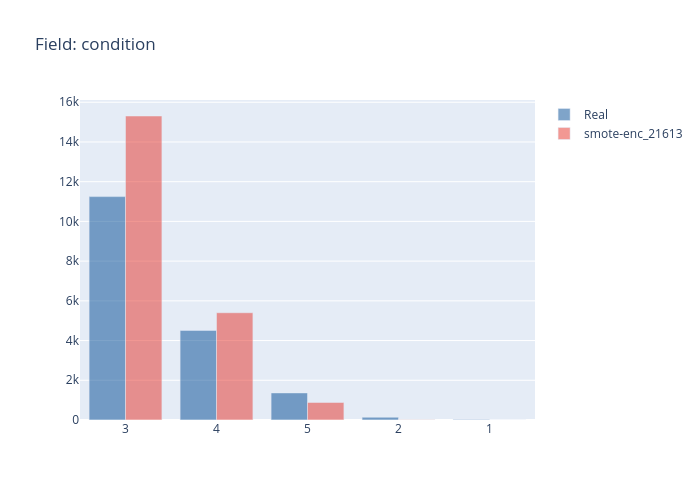

None

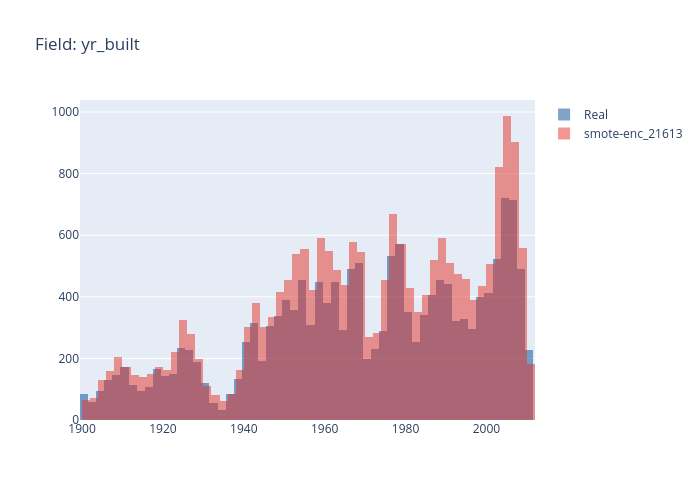

None

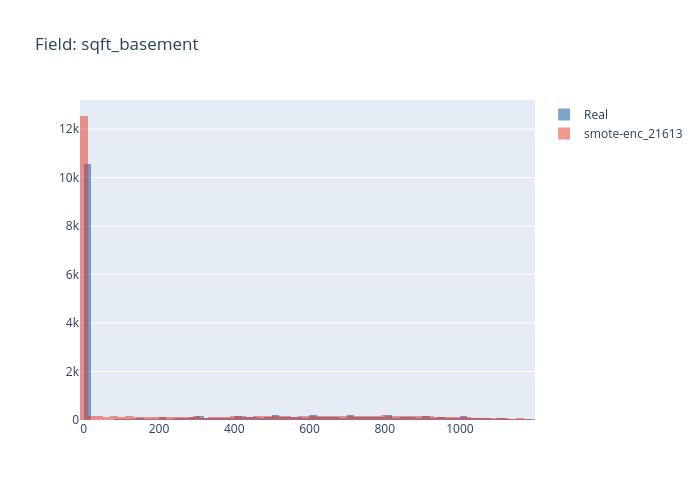

None

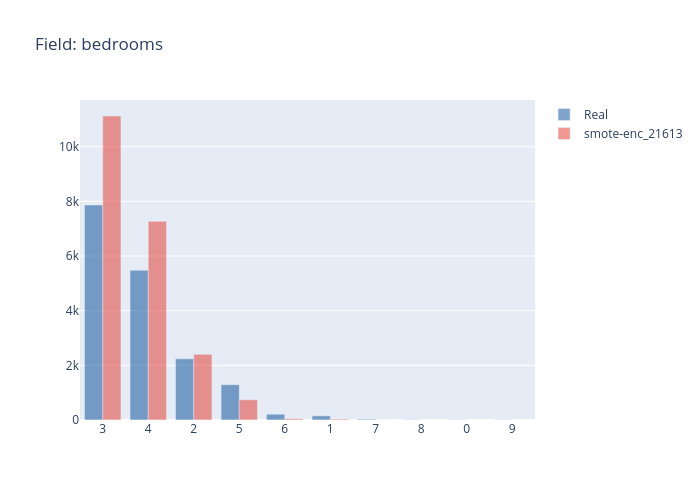

None

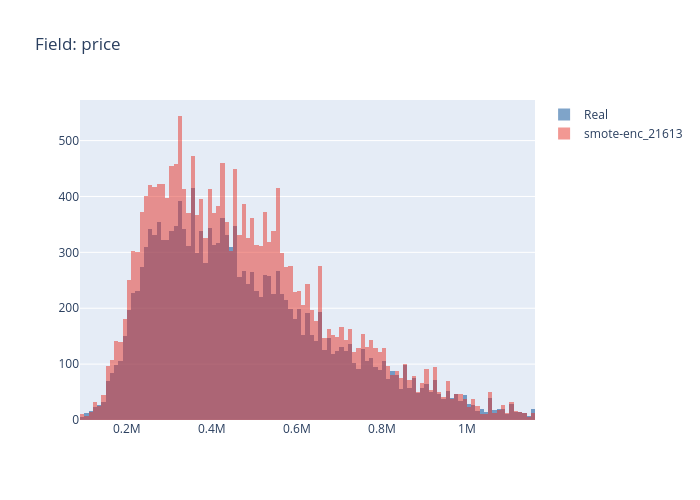

None

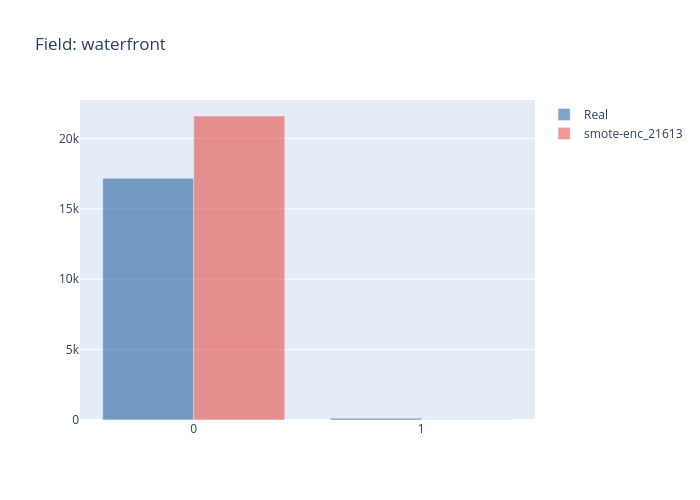

None

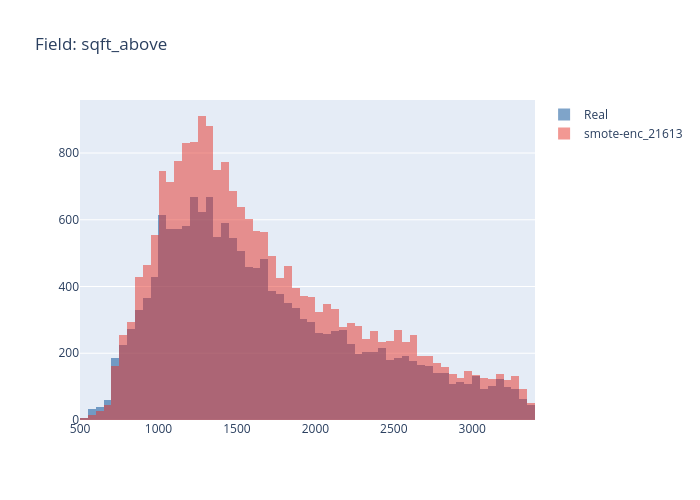

None

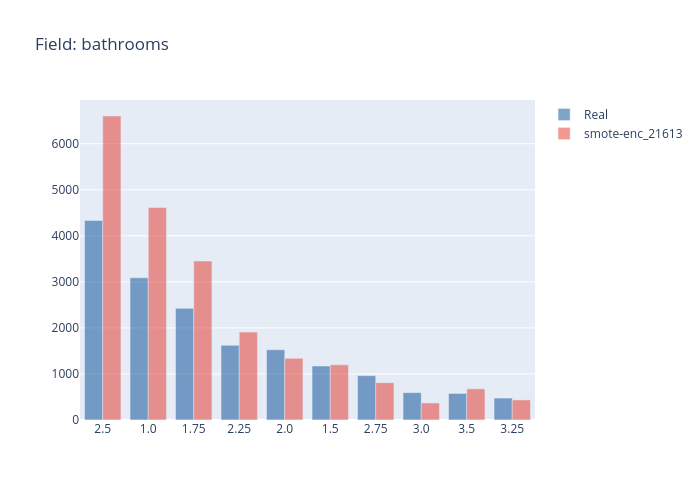

None

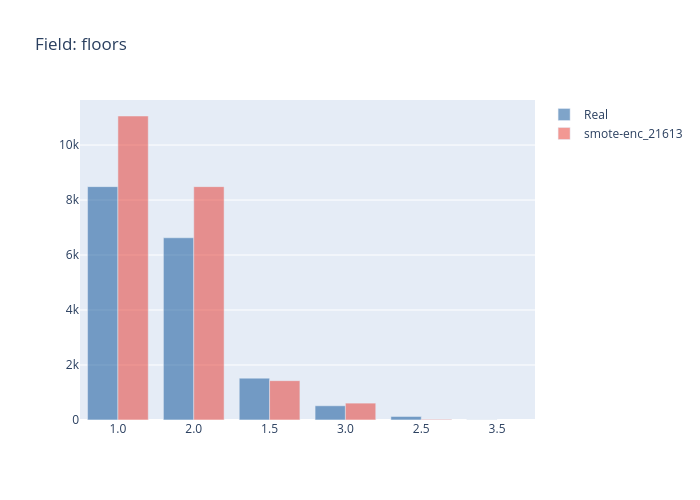

None

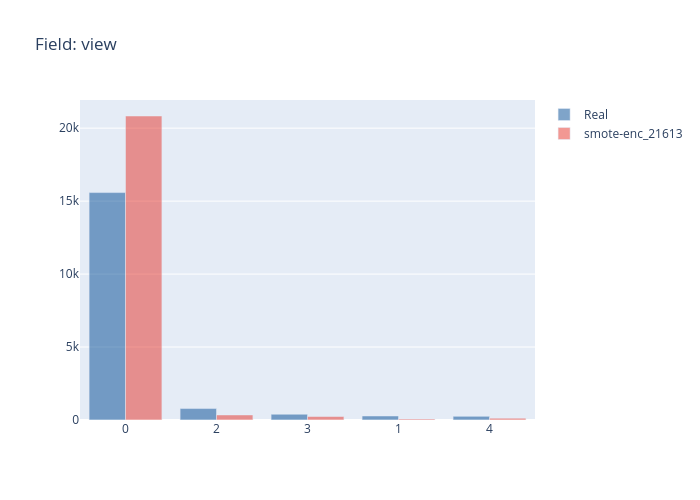

None

In [14]:
from syntheticml.data.charts import Charts
import os
folder_path = f"../docs/tesis/imagenes/kingcounty/{second_best_model}"
if not os.path.exists(folder_path):
    os.mkdir(folder_path)
for fig in syn.get_charts(second_best_model, {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        file_name = f'{fig.layout.title.text.replace(":","").replace(" ","_").lower()}.svg'
        fig.write_image(f"{folder_path}/{file_name}")
        display(fig.show("png"))

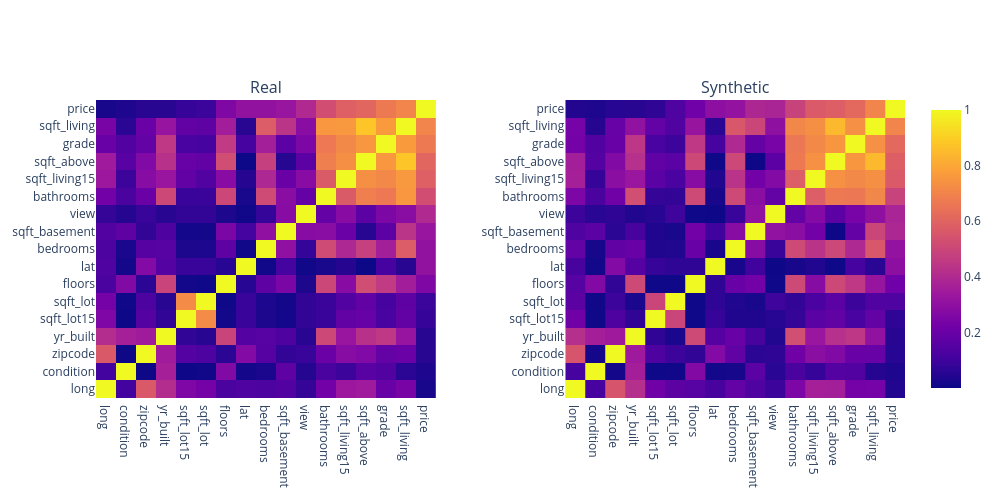

In [15]:
syn.charts.pair_corr(syn.df, syn.fake_data[best_model], {'id', 'waterfront', 'yr_renovated'}, "price").update_layout(dict(width=1000)).show("png")

In [16]:
current_metrics = syn.current_metrics()
fake_metrics = syn.get_metrics_fake()

In [17]:
columns = ["bathrooms", "sqft_lot", "sqft_above", "price", "sqft_lot15", "sqft_living", "sqft_basement", "yr_built", "sqft_living15", "grade"]

In [18]:
current_metrics.loc[(current_metrics.name.isin(columns) & current_metrics.is_categorical),:].dropna(axis=1, how='all')

,name,top5,top5_freq,top5_prob,is_categorical,nobs,missing
3,bathrooms,"[2.5, 1.0, 1.75, 2.25, 2.0]","[4333, 3088, 2425, 1621, 1526]","[0.2506072874493927, 0.17860034702139965, 0.14...",True,17290.0,17290.0
19,grade,"[7, 8, 9, 6, 10]","[7201, 4879, 2072, 1620, 915]","[0.4164835164835165, 0.28218623481781374, 0.11...",True,17290.0,17290.0


In [19]:
models = ["smote-enc_21613", "tddpm_mlp_21613"]
prop_cat = ["name", "top5", "top5_prob"]
import numpy as np
columns = list(current_metrics.name.unique())
dfs = [
    current_metrics.loc[(current_metrics.name.isin(columns) & current_metrics.is_categorical),prop_cat].dropna(axis=1, how='all').assign(model="Real")
]
for model_name in models:
    dfs.append(fake_metrics[model_name].loc[(fake_metrics[model_name].name.isin(columns) & fake_metrics[model_name].is_categorical),prop_cat].dropna(axis=1, how='all').assign(model=model_name))

diffdf = pd.concat(dfs).sort_values(["name", "model"], ascending=[True, True]).loc[:, ["model", "name"] + prop_cat[1:]]


for name in diffdf.name.unique():
    #print(name)
    #print(diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")) , ["top5_prob"]])
    #print(diffdf.loc[((diffdf.name == name) & (diffdf.model == "Real")), ["top5_prob"]])
    #diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")), ["top5_prob"]] = np.abs(diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")) , ["top5_prob"]].values
    #    - diffdf.loc[((diffdf.name == name) & (diffdf.model == "Real")), ["top5_prob"]].values)
    #print(
    #    np.array(np.abs(diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")) , ["top5_prob"]].values
    #    - diffdf.loc[((diffdf.name == name) & (diffdf.model == "Real")), ["top5_prob"]].values).tolist()).reshape(-1,5).sum(axis=1).reshape(-1,1)
    #)

    #diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")), ["top5_prob"]] = np.array(np.abs(diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")) , ["top5_prob"]].values
    #    - diffdf.loc[((diffdf.name == name) & (diffdf.model == "Real")), ["top5_prob"]].values).tolist()).reshape(-1,5).sum(axis=1).reshape(-1,1)

    #diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")), ["top5_prob"]] = np.array(np.abs(diffdf.loc[((diffdf.name == name) & (diffdf.model != "Real")) , ["top5_prob"]].values
    #- diffdf.loc[((diffdf.name == name) & (diffdf.model == "Real")), ["top5_prob"]].values).tolist()).sum(axis=2)
    pass
diffdf
#print(diffdf.style.to_latex().replace("_", "\_"))

,model,name,top5,top5_prob
3,Real,bathrooms,"[2.5, 1.0, 1.75, 2.25, 2.0]","[0.2506072874493927, 0.17860034702139965, 0.14..."
4,smote-enc_21613,bathrooms,"[2.5, 1.0, 1.75, 2.25, 2.0]","[0.30545017118534284, 0.2134727491440733, 0.15..."
5,tddpm_mlp_21613,bathrooms,"[2.5, 1.0, 1.75, 2.25, 2.0]","[0.2693749132466571, 0.18414842918613797, 0.13..."
11,Real,bedrooms,"[3, 4, 2, 5, 6]","[0.4548872180451128, 0.3167727009832273, 0.129..."
11,smote-enc_21613,bedrooms,"[3, 4, 2, 5, 6]","[0.5145738872952715, 0.3362172665864717, 0.111..."
12,tddpm_mlp_21613,bedrooms,"[3, 4, 2, 5, 1]","[0.4802665062693749, 0.3231851200666266, 0.124..."
0,Real,condition,"[3, 4, 5, 2, 1]","[0.6505494505494506, 0.2609600925390399, 0.078..."
0,smote-enc_21613,condition,"[3, 4, 5, 2, 1]","[0.7081983899324512, 0.24983806791894142, 0.04..."
0,tddpm_mlp_21613,condition,"[3, 4, 5, 2, 1]","[0.6910655623930042, 0.25248692916300375, 0.05..."
16,Real,date,"[20140623T000000, 20140625T000000, 20140626T00...","[0.007113938692886061, 0.006072874493927126, 0..."


In [20]:
models = ["smote-enc_21613", "tddpm_mlp_21613"]
prop_cat = ["name", "range", "min", "1.0%", "mean", "99.0%", "max"]
import numpy as np
columns = list(current_metrics.name.unique())
dfs = [
    current_metrics.loc[(current_metrics.name.isin(columns) & ~current_metrics.is_categorical),prop_cat].dropna(axis=1, how='all').assign(model="Real")
]
for model_name in models:
    dfs.append(fake_metrics[model_name].loc[(fake_metrics[model_name].name.isin(columns) & ~fake_metrics[model_name].is_categorical),prop_cat].dropna(axis=1, how='all').assign(model=model_name))

diffdf = pd.concat(dfs).sort_values(["name", "model"], ascending=[True, True]).loc[:, ["model", "name"] + prop_cat[1:]]
diffdf

,model,name,range,min,1.0%,mean,99.0%,max
4,Real,lat,6.183000e-01,47.159300,47.257334,47.560330,4.777281e+01,4.777760e+01
5,smote-enc_21613,lat,5.946329e-01,47.182483,47.259179,47.561174,4.777078e+01,4.777712e+01
4,tddpm_mlp_21613,lat,6.138843e-01,47.163698,47.263407,47.557563,4.777099e+01,4.777758e+01
12,Real,long,1.204000e+00,-122.519000,-122.408000,-122.214139,-1.217870e+02,-1.213150e+02
13,smote-enc_21613,long,1.191630e+00,-122.509976,-122.405187,-122.213332,-1.217869e+02,-1.213183e+02
13,tddpm_mlp_21613,long,1.204000e+00,-122.519000,-122.405513,-122.226915,-1.218597e+02,-1.213150e+02
10,Real,price,7.625000e+06,75000.000000,154467.000000,537768.047947,1.950000e+06,7.700000e+06
12,smote-enc_21613,price,5.222000e+06,78000.000000,155130.000000,522803.332608,1.794343e+06,5.300000e+06
11,tddpm_mlp_21613,price,7.625000e+06,75000.000000,151989.241770,534197.897520,1.834752e+06,7.700000e+06
17,Real,sqft_above,8.570000e+03,290.000000,700.000000,1785.962175,4.371100e+03,8.860000e+03


In [21]:
k = syn.get_details()

In [22]:
k.keys()

dict_keys(['copulagan_21613', 'tvae_21613', 'gaussiancopula_21613', 'ctgan_21613', 'smote-enc_21613', 'tddpm_mlp_21613', 'copulagan_noise_21613', 'tvae_noise_21613', 'gaussiancopula_noise_21613', 'ctgan_noise_21613', 'smote-enc_noise_21613', 'tddpm_mlp_noise_21613'])

In [23]:
k['smote-enc_21613']['report']['column_pair_trends']
#k['smote-enc_21613']['report']['column_shape']

,Column 1,Column 2,Metric,Quality Score,Real Correlation,Synthetic Correlation
0,price,sqft_living,CorrelationSimilarity,0.980796,0.702035,0.663627
1,price,sqft_lot,CorrelationSimilarity,0.984719,0.089661,0.059099
2,price,sqft_above,CorrelationSimilarity,0.977761,0.605567,0.561089
3,price,sqft_basement,CorrelationSimilarity,0.995593,0.323816,0.315003
4,price,yr_built,CorrelationSimilarity,0.994435,0.054012,0.065142
...,...,...,...,...,...,...
185,yr_renovated,zipcode,ContingencySimilarity,0.964767,NaN,NaN
186,lat,zipcode,ContingencySimilarity,0.959868,NaN,NaN
187,long,zipcode,ContingencySimilarity,0.961485,NaN,NaN
188,sqft_living15,zipcode,ContingencySimilarity,0.940756,NaN,NaN


In [54]:
pd.concat(
    [k[model_name]['report']['column_pair_trends'].loc[:,["Column 1", "Quality Score"]].groupby("Column 1").mean(numeric_only=True).assign(model=model_name) for model_name in models]
).reset_index().pivot(index=["Column 1"], values="Quality Score", columns="model").sort_values("smote-enc_21613", ascending=False)

model,smote-enc_21613,tddpm_mlp_21613
Column 1,,
lat,0.987055,0.977903
long,0.984648,0.973851
price,0.981687,0.980209
sqft_basement,0.980411,0.975983
sqft_above,0.978812,0.976672
sqft_living,0.978285,0.979511
sqft_lot15,0.977793,0.979565
waterfront,0.977516,0.968229
sqft_lot,0.973433,0.963186


In [57]:
display(
    pd.concat(
    [k[model_name]['report']['column_shape'].assign(model=model_name) for model_name in models]
).pivot(index=["Column","Metric"], values="Quality Score", columns="model").sort_values("smote-enc_21613", ascending=False)
#.style.to_latex().replace("_", "\_")
)

,model,smote-enc_21613,tddpm_mlp_21613
Column,Metric,,
yr_renovated,KSComplement,0.993521,0.983621
waterfront,TVComplement,0.993476,0.995281
lat,KSComplement,0.991201,0.967797
long,KSComplement,0.987587,0.958543
sqft_lot15,KSComplement,0.984718,0.982927
sqft_lot,KSComplement,0.984708,0.985379
sqft_living15,KSComplement,0.982320,0.976357
yr_built,KSComplement,0.982157,0.986443
sqft_living,KSComplement,0.982033,0.986397


In [26]:
display(
    pd.concat(
    [k[model_name]['diagnostic']['coverage'].assign(model=model_name) for model_name in models]
).pivot(index=["Column","Metric"], values="Diagnostic Score", columns="model").sort_values("smote-enc_21613", ascending=False)
#.style.to_latex().replace("_", "\_")
)

,model,smote-enc_21613,tddpm_mlp_21613
Column,Metric,,
zipcode,CategoryCoverage,1.000000,1.000000
condition,CategoryCoverage,1.000000,1.000000
waterfront,CategoryCoverage,1.000000,1.000000
view,CategoryCoverage,1.000000,1.000000
yr_built,RangeCoverage,1.000000,1.000000
yr_renovated,RangeCoverage,0.999941,0.999999
long,RangeCoverage,0.989726,1.000000
date,CategoryCoverage,0.962366,0.916667
lat,RangeCoverage,0.956463,0.987428


In [27]:
list(k.keys())

['copulagan_21613',
 'tvae_21613',
 'gaussiancopula_21613',
 'ctgan_21613',
 'smote-enc_21613',
 'tddpm_mlp_21613',
 'copulagan_noise_21613',
 'tvae_noise_21613',
 'gaussiancopula_noise_21613',
 'ctgan_noise_21613',
 'smote-enc_noise_21613',
 'tddpm_mlp_noise_21613']

In [28]:
pair_trends = k['smote-enc_21613']['report']['column_pair_trends']
pair_trends[pair_trends['Column 1'] == "price"]

,Column 1,Column 2,Metric,Quality Score,Real Correlation,Synthetic Correlation
0,price,sqft_living,CorrelationSimilarity,0.980796,0.702035,0.663627
1,price,sqft_lot,CorrelationSimilarity,0.984719,0.089661,0.059099
2,price,sqft_above,CorrelationSimilarity,0.977761,0.605567,0.561089
3,price,sqft_basement,CorrelationSimilarity,0.995593,0.323816,0.315003
4,price,yr_built,CorrelationSimilarity,0.994435,0.054012,0.065142
5,price,yr_renovated,CorrelationSimilarity,0.994972,0.126434,0.116379
8,price,sqft_living15,CorrelationSimilarity,0.999054,0.585379,0.587270
9,price,sqft_lot15,CorrelationSimilarity,0.989184,0.082447,0.060814
105,price,waterfront,ContingencySimilarity,0.984264,NaN,NaN
106,price,view,ContingencySimilarity,0.937490,NaN,NaN
